#### Import simulator and validator

In [170]:
from app.model.NSNP import NumericalSNPSystem
from app.middleware.nsnp_validation import NSNPSchema

#### Import helper libraries

In [171]:
import json, time, glob, re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [172]:
def next_config_average_time(file):
    with open(file, 'r') as f:
            data = json.load(f)

    schema = NSNPSchema()
    system = NumericalSNPSystem(
        schema.load({
            'neurons' : data['nodes'],
            'syn' : data['edges']
        })
    )

    # Initial simulation
    system.simulate(branch='initial')

    # Get next config
    state_graph = system.get_state_graph()
    initial_config = state_graph['nodes'][0]
    next_config = initial_config['next'][0]
    time_list = []

    for i in range(5):
        start = time.time()
        config_details = system.next(next_config, None)
        end = time.time()
        
        next_config = config_details['next']
        elapsed_time = end - start
        time_list.append(elapsed_time)

    return (np.mean(time_list), time_list)

##### Chain - one spike

In [173]:
oc_pattern = r'app\\tests\\chain\\one-chain-(\d+).json'
oc_files = glob.glob('app\\tests\\chain\\one-chain-*.json')
oc_files = list(filter(lambda x: re.match(oc_pattern, x), oc_files))
oc_avg_times = []

for file in oc_files:
    average_time, time_list = next_config_average_time(file)
    match = re.match(oc_pattern, file)
    nodes = int(match.group(1))
    oc_avg_times.append([nodes, average_time])

oc_avg_times.sort(key=lambda x: x[0])
oc_avg_times = pd.DataFrame(oc_avg_times, columns=['nodes', 'average_time'])
oc_avg_times

,nodes,average_time
0,50,0.002201
1,100,0.018800
2,150,0.024800
3,200,0.050000
4,250,0.066600
5,300,0.090239
6,350,0.144199
7,400,0.179207
8,450,0.219198
9,500,0.260608


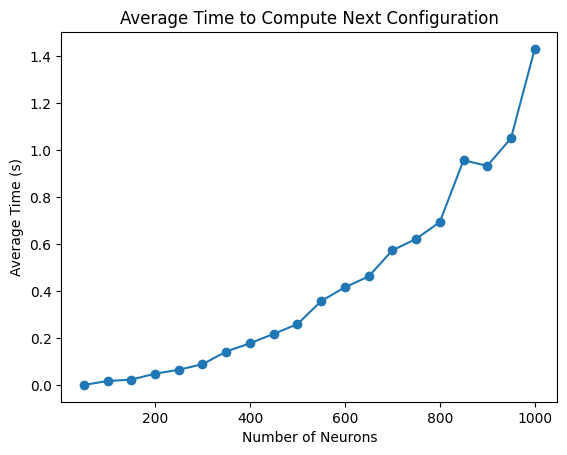

In [174]:
# plot with matplotlib
fig, ax = plt.subplots()
ax.plot(oc_avg_times['nodes'], oc_avg_times['average_time'], 'o-')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
plt.show()


##### Chain - one spike loop

In [175]:
ocl_pattern = r'app\\tests\\chain\\one-chain-(\d+)-loop.json'
ocl_files = glob.glob('app\\tests\\chain\\one-chain-*.json')
ocl_files = list(filter(lambda x: re.match(ocl_pattern, x), ocl_files))
ocl_avg_times = []

for file in ocl_files:
    average_time, time_list = next_config_average_time(file)
    match = re.match(ocl_pattern, file)
    nodes = int(match.group(1))
    ocl_avg_times.append([nodes, average_time])

ocl_avg_times.sort(key=lambda x: x[0])
ocl_avg_times = pd.DataFrame(ocl_avg_times, columns=['nodes', 'average_time'])
ocl_avg_times

,nodes,average_time
0,50,0.002000
1,100,0.011799
2,150,0.025201
3,200,0.032600
4,250,0.104601
5,300,0.103200
6,350,0.116201
7,400,0.147199
8,450,0.217000
9,500,0.269999


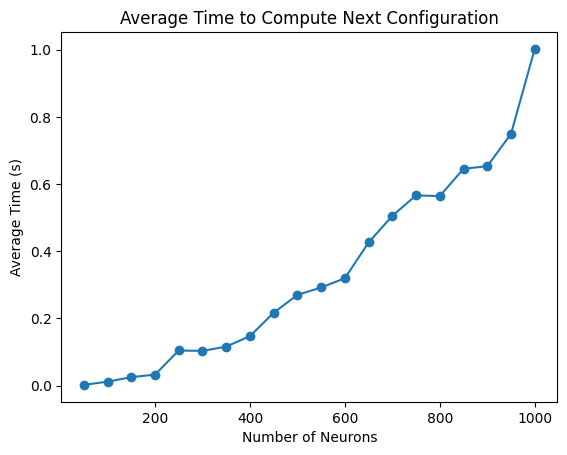

In [176]:
# plot with matplotlib
fig, ax = plt.subplots()
ax.plot(ocl_avg_times['nodes'], ocl_avg_times['average_time'], 'o-')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
plt.show()

##### Chain - all spike

In [177]:
ac_pattern = r'app\\tests\\chain\\all-chain-(\d+).json'
ac_files = glob.glob('app\\tests\\chain\\all-chain-*.json')
ac_files = list(filter(lambda x: re.match(ac_pattern, x), ac_files))
ac_avg_times = []

for file in ac_files:
    average_time, time_list = next_config_average_time(file)
    match = re.match(ac_pattern, file)
    nodes = int(match.group(1))
    ac_avg_times.append([nodes, average_time])

ac_avg_times.sort(key=lambda x: x[0])
ac_avg_times = pd.DataFrame(ac_avg_times, columns=['nodes', 'average_time'])
ac_avg_times

,nodes,average_time
0,50,0.003200
1,100,0.011209
2,150,0.024063
3,200,0.045397
4,250,0.138000
5,300,0.158200
6,350,0.147196
7,400,0.195600
8,450,0.292400
9,500,0.359801


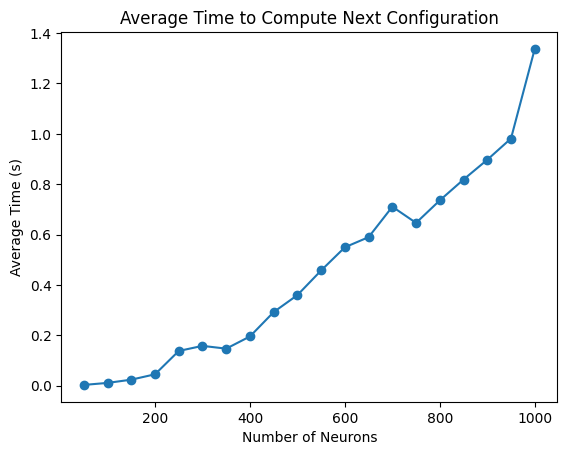

In [178]:
fig, ax = plt.subplots()
ax.plot(ac_avg_times['nodes'], ac_avg_times['average_time'], 'o-')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
plt.show()

#### Chain - all spike loop

In [179]:
acl_pattern = r'app\\tests\\chain\\all-chain-(\d+)-loop.json'
acl_files = glob.glob('app\\tests\\chain\\all-chain-*.json')
acl_files = list(filter(lambda x: re.match(acl_pattern, x), acl_files))
acl_avg_times = []

for file in acl_files:
    average_time, time_list = next_config_average_time(file)
    match = re.match(acl_pattern, file)
    nodes = int(match.group(1))
    acl_avg_times.append([nodes, average_time])

acl_avg_times.sort(key=lambda x: x[0])
acl_avg_times = pd.DataFrame(acl_avg_times, columns=['nodes', 'average_time'])
acl_avg_times

,nodes,average_time
0,50,0.002200
1,100,0.023002
2,150,0.027199
3,200,0.037801
4,250,0.067000
5,300,0.080602
6,350,0.116600
7,400,0.196401
8,450,0.209598
9,500,0.239800


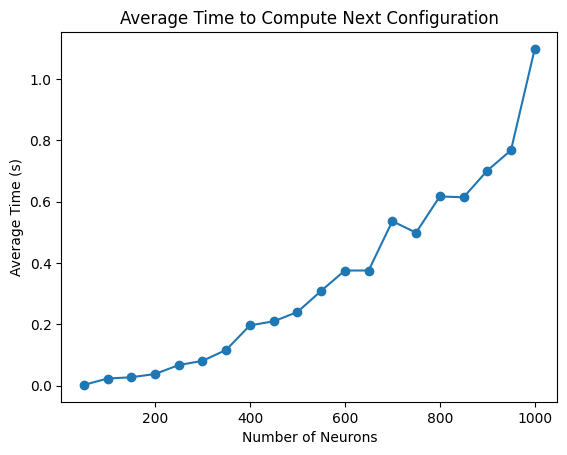

In [180]:
fig, ax = plt.subplots()
ax.plot(acl_avg_times['nodes'], acl_avg_times['average_time'], 'o-')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
plt.show()

##### Complete - Simple

In [181]:
sc_pattern = r'app\\tests\\complete\\simple-complete-(\d+).json'
sc_files = glob.glob('app\\tests\\complete\\simple-complete-*.json')
sc_files = list(filter(lambda x: re.match(sc_pattern, x), sc_files))
sc_avg_times = []

for file in sc_files:
    average_time, time_list = next_config_average_time(file)
    match = re.match(sc_pattern, file)
    nodes = int(match.group(1))
    sc_avg_times.append([nodes, average_time])

sc_avg_times.sort(key=lambda x: x[0])
sc_avg_times = pd.DataFrame(sc_avg_times, columns=['nodes', 'average_time'])
sc_avg_times

,nodes,average_time
0,50,0.002995
1,100,0.013034
2,150,0.027165
3,200,0.048600
4,250,0.114601
5,300,0.121600
6,350,0.167400
7,400,0.252599
8,450,0.222519
9,500,0.275338


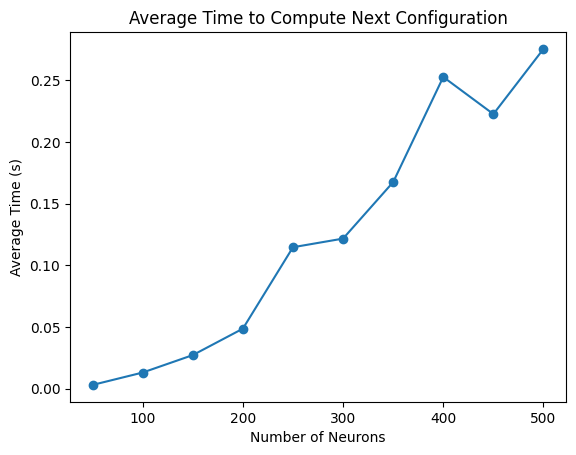

In [182]:
fig, ax = plt.subplots()
ax.plot(sc_avg_times['nodes'], sc_avg_times['average_time'], 'o-')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
plt.show()

##### Complete - Benchmark

In [183]:
bc_pattern = r'app\\tests\\complete\\benchmark-complete-(\d+).json'
bc_files = glob.glob('app\\tests\\complete\\benchmark-complete-*.json')
bc_files = list(filter(lambda x: re.match(bc_pattern, x), bc_files))
bc_avg_times = []

for file in bc_files:
    average_time, time_list = next_config_average_time(file)
    match = re.match(bc_pattern, file)
    nodes = int(match.group(1))
    bc_avg_times.append([nodes, average_time])

bc_avg_times.sort(key=lambda x: x[0])
bc_avg_times = pd.DataFrame(bc_avg_times, columns=['nodes', 'average_time'])
bc_avg_times

,nodes,average_time
0,50,0.011153
1,100,0.056000
2,150,0.127000
3,200,0.205000
4,250,0.354000
5,300,0.573399
6,350,0.701999
7,400,0.775397
8,450,0.984803
9,500,1.567400


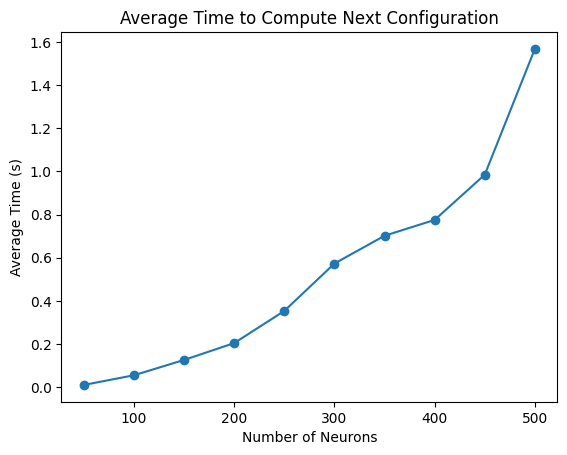

In [184]:
fig, ax = plt.subplots()
ax.plot(bc_avg_times['nodes'], bc_avg_times['average_time'], 'o-')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
plt.show()

##### Subset Sum

In [185]:
ss_pattern = r'app\\tests\\subsetsum\\subset-(\d+)-(\d+).json'
ss_files = glob.glob('app\\tests\\subsetsum\\subset-*.json')
ss_files = list(filter(lambda x: re.match(ss_pattern, x), ss_files))
ss_avg_times = []

for file in ss_files:
    average_time, time_list = next_config_average_time(file)
    match = re.match(ss_pattern, file)
    V = int(match.group(1))
    S = int(match.group(2))
    ss_avg_times.append([V, average_time])

ss_avg_times.sort(key=lambda x: x[0])
ss_avg_times = pd.DataFrame(ss_avg_times, columns=['V', 'average_time'])
ss_avg_times

,V,average_time
0,50,0.013977
1,100,0.065961
2,150,0.153800
3,200,0.248599
4,250,0.407184
5,300,0.550200
6,350,0.797799
7,400,1.061600
8,450,1.325601
9,500,2.019944


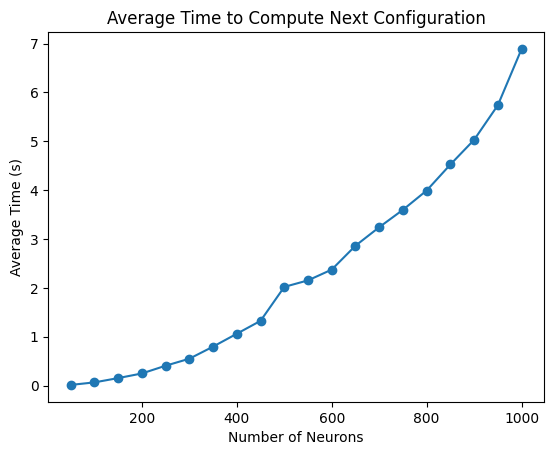

In [186]:
fig, ax = plt.subplots()
ax.plot(ss_avg_times['V'], ss_avg_times['average_time'], 'o-')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
plt.show()

##### Plot together

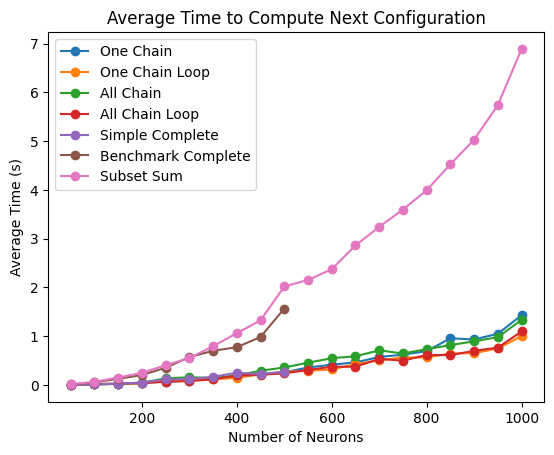

In [187]:
fig, ax = plt.subplots()
ax.plot(oc_avg_times['nodes'], oc_avg_times['average_time'], 'o-', label='One Chain')
ax.plot(ocl_avg_times['nodes'], ocl_avg_times['average_time'], 'o-', label='One Chain Loop')
ax.plot(ac_avg_times['nodes'], ac_avg_times['average_time'], 'o-', label='All Chain')
ax.plot(acl_avg_times['nodes'], acl_avg_times['average_time'], 'o-', label='All Chain Loop')
ax.plot(sc_avg_times['nodes'], sc_avg_times['average_time'], 'o-', label='Simple Complete')
ax.plot(bc_avg_times['nodes'], bc_avg_times['average_time'], 'o-', label='Benchmark Complete')
ax.plot(ss_avg_times['V'], ss_avg_times['average_time'], 'o-', label='Subset Sum')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
ax.legend()
plt.show()


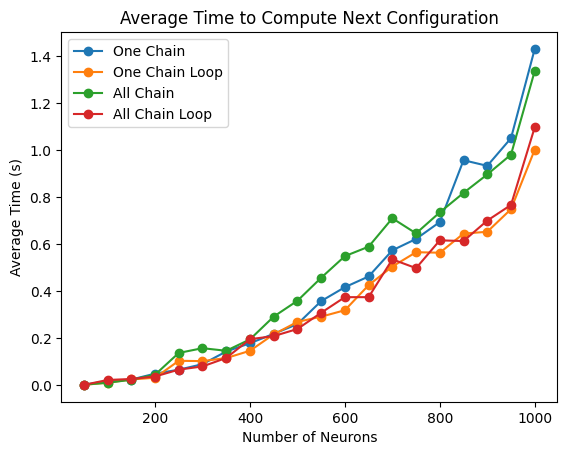

In [188]:
# plot chains
fig, ax = plt.subplots()
ax.plot(oc_avg_times['nodes'], oc_avg_times['average_time'], 'o-', label='One Chain')
ax.plot(ocl_avg_times['nodes'], ocl_avg_times['average_time'], 'o-', label='One Chain Loop')
ax.plot(ac_avg_times['nodes'], ac_avg_times['average_time'], 'o-', label='All Chain')
ax.plot(acl_avg_times['nodes'], acl_avg_times['average_time'], 'o-', label='All Chain Loop')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
ax.legend()

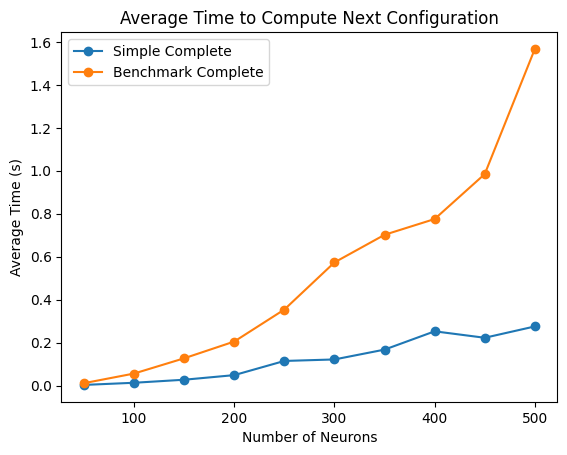

In [189]:
# plot complete graphs
fig, ax = plt.subplots()
ax.plot(sc_avg_times['nodes'], sc_avg_times['average_time'], 'o-', label='Simple Complete')
ax.plot(bc_avg_times['nodes'], bc_avg_times['average_time'], 'o-', label='Benchmark Complete')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
ax.legend()
plt.show()

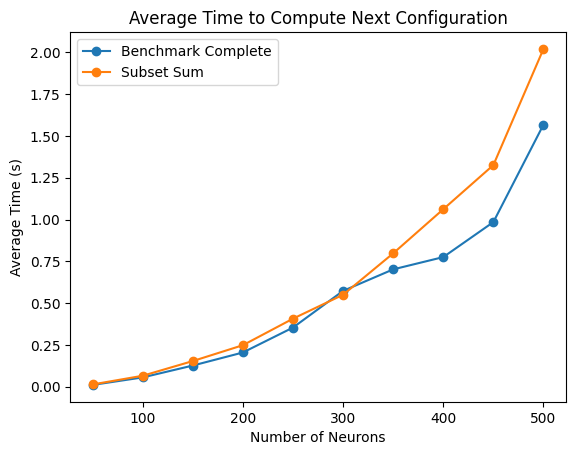

In [197]:
# plot subset sum and complete benchmark up to 500 neurons
fig, ax = plt.subplots()
ss_avg_times_500 = ss_avg_times[ss_avg_times['V'] <= 500]
ax.plot(bc_avg_times['nodes'], bc_avg_times['average_time'], 'o-', label='Benchmark Complete')
ax.plot(ss_avg_times_500['V'], ss_avg_times_500['average_time'], 'o-', label='Subset Sum')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
ax.legend()
plt.show()